# Lab: Model Validation & Iteration


In [1]:
import pandas as pd
import seaborn as sns

In [5]:
marketing_df = pd.read_csv('marketing_customer_analysis_clean.csv')
marketing_df = marketing_df.drop('unnamed:_0',axis=1)
marketing_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1


In [6]:
marketing_df.rename(columns=lambda name:name.lower().replace(' ','_'), inplace=True)
marketing_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size', 'vehicle_type', 'month'],
      dtype='object')

In [7]:
# divide df into numerical and categorical dfs
marketing_numerical = marketing_df.select_dtypes(include='number')
marketing_categorical = marketing_df.select_dtypes(include='object')

In [8]:
# apply one hot encoding to nominal values
marketing_nominal = pd.get_dummies(marketing_categorical[['state','employmentstatus','gender','location_code',
                                                          'marital_status','policy_type','policy','renew_offer_type',
                                                          'sales_channel','vehicle_class']],
                                   dtype=int)
marketing_nominal

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,...,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
10906,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
10907,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
10908,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [9]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
ord_enc = OrdinalEncoder()
oh_enc = OneHotEncoder()

In [10]:
marketing_ordinal = marketing_df[['response', 'coverage', 'education', 'vehicle_size']]
marketing_ordinal.head()

,response,coverage,education,vehicle_size
0,No,Basic,College,Medsize
1,No,Basic,College,Medsize
2,No,Basic,Bachelor,Medsize
3,Yes,Extended,College,Medsize
4,No,Premium,Bachelor,Medsize


In [ ]:
# reference code from previous lab
# ordinal data to encode: response, coverage, education, vehicle_size
#response
#coverage_ordinal_map = {'Basic':0, 'Extended':1, 'Premium':2}
#ducation_ordinal_map = {'College':1, 'Bachelor':2, 'High School or Below':0, 'Doctor':4, 'Master':3}
#vehiclesize_ordinal_map = {'Medsize':1, 'Small':0, 'Large':2}


In [11]:
# apply OrdinalEncoder to ordinal df
response_enc = OrdinalEncoder(categories=[['No','Yes']])
marketing_ordinal['response'] = response_enc.fit_transform(marketing_ordinal[['response']])

coverage_enc = OrdinalEncoder(categories=[['Basic','Extended','Premium']])
marketing_ordinal['coverage'] = coverage_enc.fit_transform(marketing_ordinal[["coverage"]])

education_enc = OrdinalEncoder(categories=[['High School or Below','College','Bachelor','Master','Doctor']])
marketing_ordinal['education'] = education_enc.fit_transform(marketing_ordinal[['education']])

vehicle_enc = OrdinalEncoder(categories=[['Small','Medsize','Large']])
marketing_ordinal['vehicle_size'] = vehicle_enc.fit_transform(marketing_ordinal[['vehicle_size']])

marketing_ordinal

/var/folders/tt/zhpd83790c19bgcn3bmmj4600000gn/T/ipykernel_69682/1035201458.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_ordinal['response'] = response_enc.fit_transform(marketing_ordinal[['response']])
/var/folders/tt/zhpd83790c19bgcn3bmmj4600000gn/T/ipykernel_69682/1035201458.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_ordinal['coverage'] = coverage_enc.fit_transform(marketing_ordinal[["coverage"]])
/var/folders/tt/zhpd83790c19bgcn3bmmj4600000gn/T/ipykernel_69682/1035201

,response,coverage,education,vehicle_size
0,0.0,0.0,1.0,1.0
1,0.0,0.0,1.0,1.0
2,0.0,0.0,2.0,1.0
3,1.0,1.0,1.0,1.0
4,0.0,2.0,2.0,1.0
...,...,...,...,...
10905,0.0,2.0,2.0,1.0
10906,0.0,0.0,1.0,1.0
10907,0.0,1.0,2.0,1.0
10908,0.0,2.0,1.0,1.0


In [12]:
# join the two categorical dfs into one

marketing_categorical = pd.concat([marketing_ordinal, marketing_nominal], axis=1)
marketing_categorical

,response,coverage,education,vehicle_size,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,employmentstatus_Disabled,...,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,0.0,0.0,1.0,1.0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,0.0,0.0,1.0,1.0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0.0,0.0,2.0,1.0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,1.0,1.0,1.0,1.0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0.0,2.0,2.0,1.0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0.0,2.0,2.0,1.0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
10906,0.0,0.0,1.0,1.0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
10907,0.0,1.0,2.0,1.0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
10908,0.0,2.0,1.0,1.0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [13]:
# join categorical with numerical

mark_df = pd.concat([marketing_categorical, marketing_numerical], axis=1)
mark_df

# customer and effective_to_date columns not included

,response,coverage,education,vehicle_size,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,employmentstatus_Disabled,...,vehicle_class_Two-Door Car,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
0,0.0,0.0,1.0,1.0,1,0,0,0,0,0,...,0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000,2
1,0.0,0.0,1.0,1.0,0,1,0,0,0,0,...,0,2228.525238,0,64,3.000000,26,0.000000,1,744.924331,1
2,0.0,0.0,2.0,1.0,0,0,0,0,1,0,...,0,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000,2
3,1.0,1.0,1.0,1.0,0,0,0,1,0,0,...,0,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411,1
4,0.0,2.0,2.0,1.0,0,0,0,1,0,0,...,0,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0.0,2.0,2.0,1.0,0,0,1,0,0,0,...,0,15563.369440,0,253,15.149071,40,0.384256,7,1214.400000,1
10906,0.0,0.0,1.0,1.0,0,0,0,1,0,0,...,0,5259.444853,61146,65,7.000000,68,0.000000,6,273.018929,1
10907,0.0,1.0,2.0,1.0,1,0,0,0,0,0,...,0,23893.304100,39837,201,11.000000,63,0.000000,2,381.306996,2
10908,0.0,2.0,1.0,1.0,0,1,0,0,0,0,...,0,11971.977650,64195,158,0.000000,27,4.000000,6,618.288849,2


### X-y split
(y is the target variable, in this case, "total claim amount")

In [14]:
mark_df = mark_df.dropna()
mark_df = mark_df.drop_duplicates()

In [15]:
import matplotlib.pyplot as plt 

In [18]:
X = mark_df.drop('total_claim_amount', axis=1)
y = mark_df[['total_claim_amount']]

### Train-test split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [22]:
X_test

,response,coverage,education,vehicle_size,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,employmentstatus_Disabled,...,vehicle_class_Sports Car,vehicle_class_Two-Door Car,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month
3173,0.0,0.0,1.0,1.0,0,1,0,0,0,0,...,0,1,5705.899103,0,74,2.000000,34,0.000000,9,1
10693,0.0,0.0,1.0,1.0,0,1,0,0,0,0,...,0,1,2834.646235,24506,71,7.000000,47,0.000000,1,2
7780,0.0,0.0,1.0,0.0,0,0,1,0,0,0,...,0,0,5573.106050,85704,69,21.000000,84,0.000000,7,2
8135,0.0,0.0,2.0,1.0,0,0,0,1,0,0,...,0,0,8193.555045,54950,103,15.149071,75,0.384256,7,2
3382,0.0,2.0,1.0,1.0,0,1,0,0,0,0,...,0,0,16350.130610,0,165,12.000000,82,1.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9202,1.0,0.0,0.0,2.0,1,0,0,0,0,0,...,0,1,20096.893370,92766,71,17.000000,15,0.000000,2,1
9022,0.0,0.0,0.0,1.0,0,1,0,0,0,0,...,0,0,5890.528762,76875,73,21.000000,4,0.000000,9,1
6860,0.0,0.0,2.0,1.0,0,1,0,0,0,1,...,0,0,5615.073509,19949,74,0.000000,99,1.000000,3,1
7863,0.0,2.0,0.0,1.0,0,0,1,0,0,0,...,0,0,9500.081670,96276,117,33.000000,81,0.000000,6,1


### Standardize the data

In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

array([[<Axes: title={'center': 'response'}>,
        <Axes: title={'center': 'coverage'}>,
        <Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'vehicle_size'}>],
       [<Axes: title={'center': 'state_Arizona'}>,
        <Axes: title={'center': 'state_California'}>,
        <Axes: title={'center': 'state_Nevada'}>,
        <Axes: title={'center': 'state_Oregon'}>],
       [<Axes: title={'center': 'state_Washington'}>,
        <Axes: title={'center': 'employmentstatus_Disabled'}>,
        <Axes: title={'center': 'employmentstatus_Employed'}>,
        <Axes: title={'center': 'employmentstatus_Medical Leave'}>],
       [<Axes: title={'center': 'employmentstatus_Retired'}>,
        <Axes: title={'center': 'employmentstatus_Unemployed'}>,
        <Axes: title={'center': 'gender_F'}>,
        <Axes: title={'center': 'gender_M'}>],
       [<Axes: title={'center': 'location_code_Rural'}>,
        <Axes: title={'center': 'location_code_Suburban'}>,
        <Axes: tit

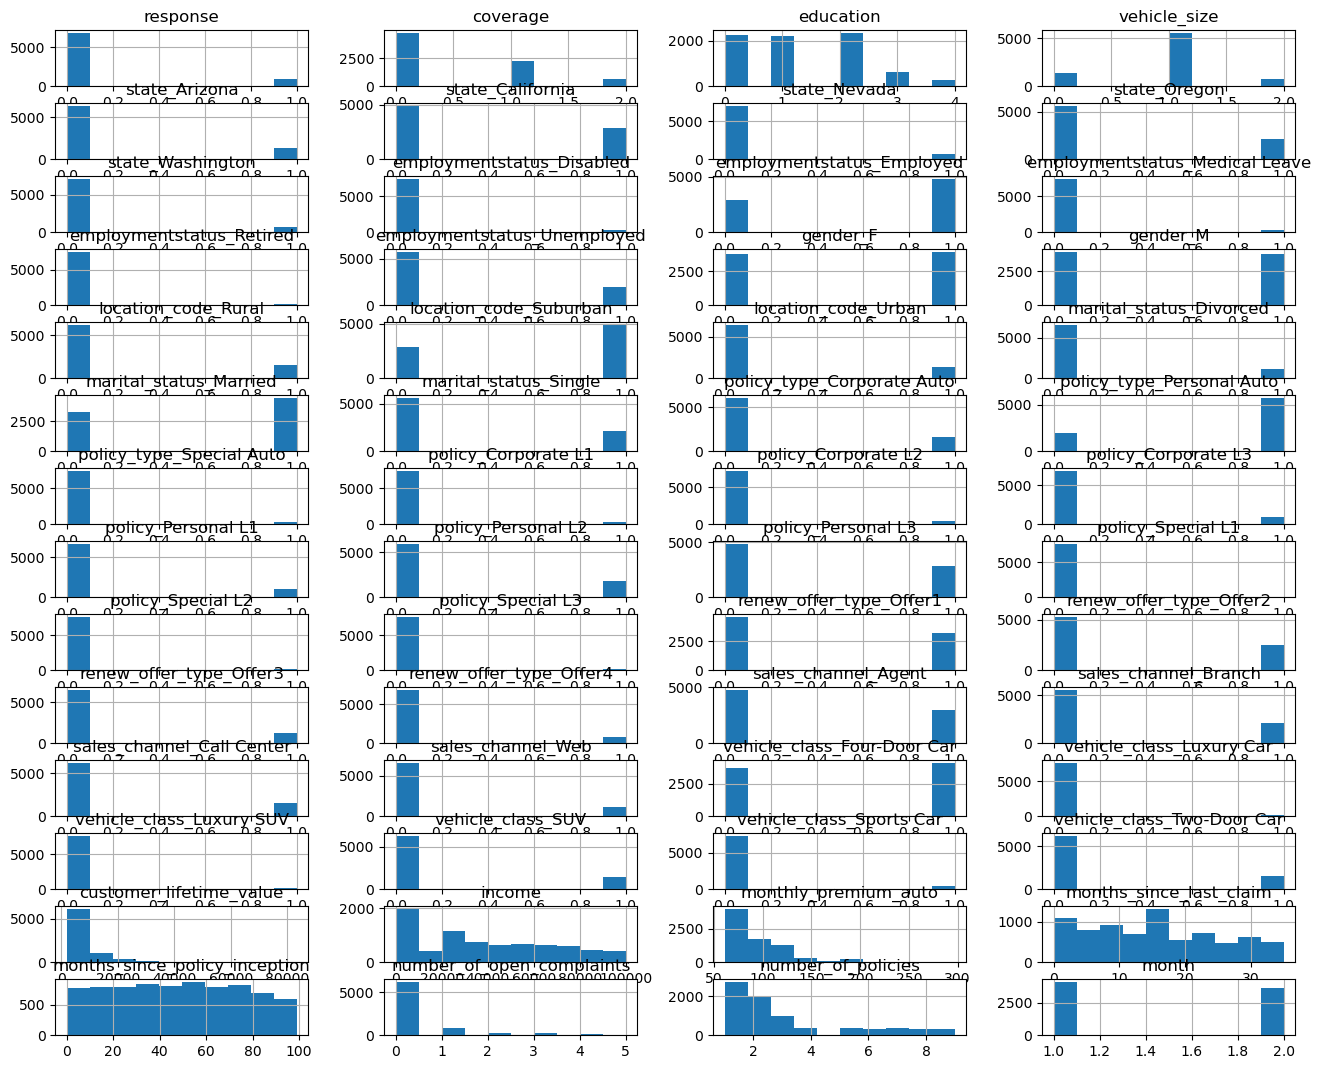

In [29]:
X_train.hist(bins=10, figsize=(16,14), layout=(15,4), sharex=False)
# consider MinMaxScaler for a wide range,
# consider StandardScaler for somewhat bell-shaped distribution
# consider PowerTransformer skewed, non-normal distribution
# ideally apply the same scaler/transformer to all inputs

array([[<Axes: title={'center': 'response'}>,
        <Axes: title={'center': 'coverage'}>,
        <Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'vehicle_size'}>],
       [<Axes: title={'center': 'state_Arizona'}>,
        <Axes: title={'center': 'state_California'}>,
        <Axes: title={'center': 'state_Nevada'}>,
        <Axes: title={'center': 'state_Oregon'}>],
       [<Axes: title={'center': 'state_Washington'}>,
        <Axes: title={'center': 'employmentstatus_Disabled'}>,
        <Axes: title={'center': 'employmentstatus_Employed'}>,
        <Axes: title={'center': 'employmentstatus_Medical Leave'}>],
       [<Axes: title={'center': 'employmentstatus_Retired'}>,
        <Axes: title={'center': 'employmentstatus_Unemployed'}>,
        <Axes: title={'center': 'gender_F'}>,
        <Axes: title={'center': 'gender_M'}>],
       [<Axes: title={'center': 'location_code_Rural'}>,
        <Axes: title={'center': 'location_code_Suburban'}>,
        <Axes: tit

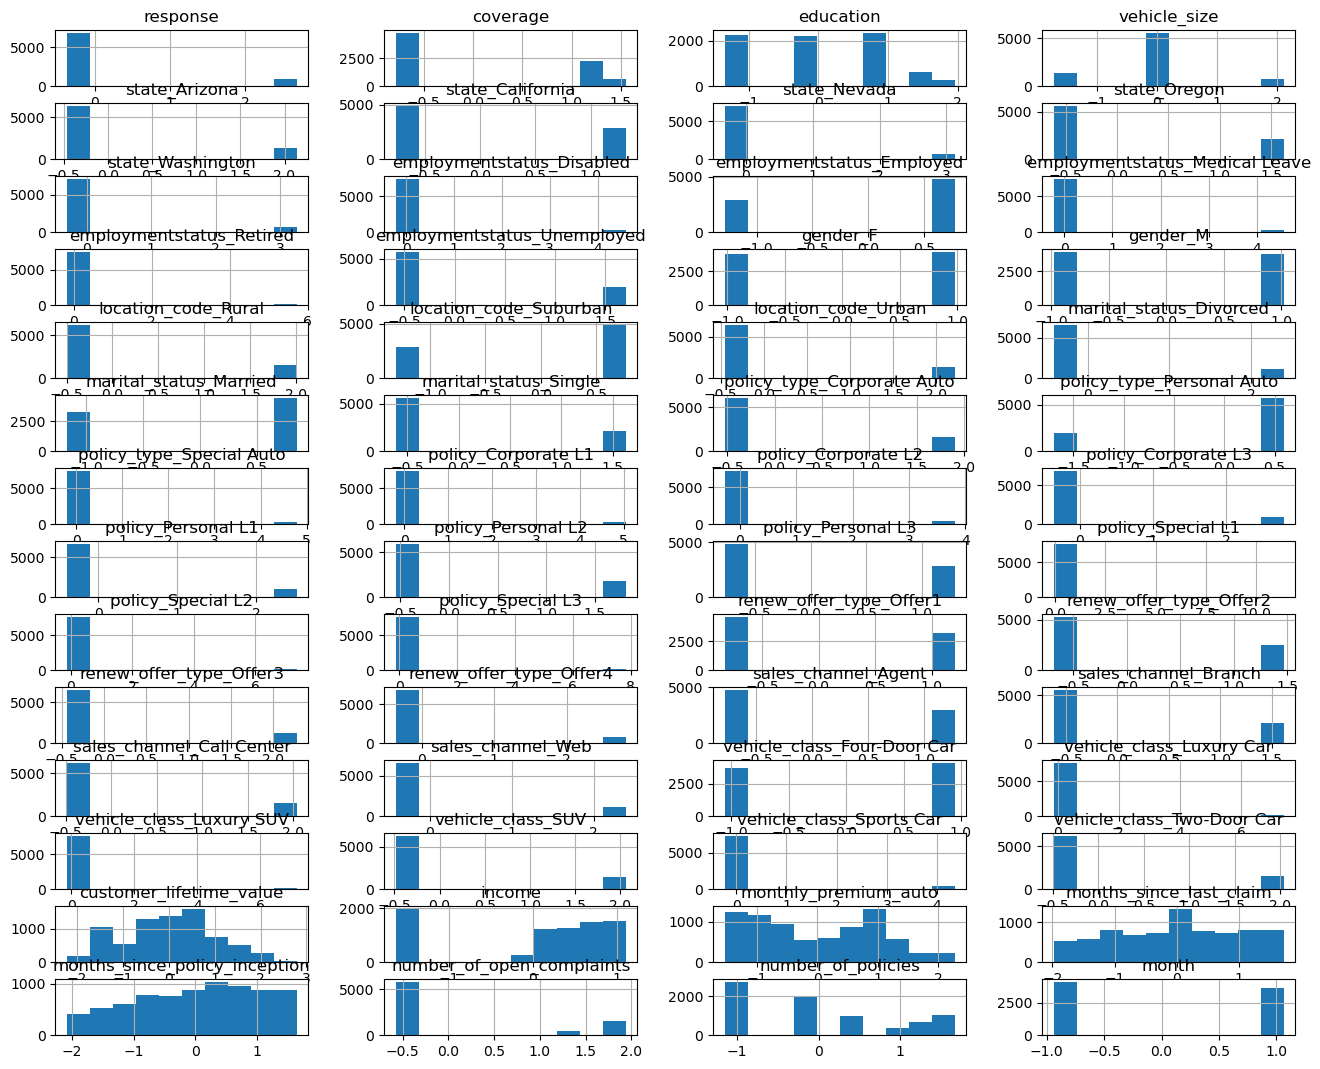

In [32]:
# apply PowerTransformer to X_train
pt_X = PowerTransformer()

# first fit the PowerTransformer to my X_train data, i.e. calibrating my machine
pt_X.fit(X_train) # first fit needs to be saved into a variable to then apply tranform onto it

# then transform X_train using the fitted transformer, i.e. applying my machine
X_train_trans = pt_X.transform(X_train)

X_train = pd.DataFrame(X_train_trans)
X_train.columns = X.columns
X_train.hist(bins=10, figsize=(16,14), layout=(15,4), sharex=False)

In [33]:
# transform the test data with the same PowerTransformer
X_test_trans = pt_X.transform(X_test)
X_test = pd.DataFrame(X_test_trans)
X_test.columns = X.columns
X_test

,response,coverage,education,vehicle_size,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,employmentstatus_Disabled,...,vehicle_class_Sports Car,vehicle_class_Two-Door Car,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month
0,-0.372409,-0.785999,-0.102471,0.145520,-0.467560,1.315308,-0.319839,-0.616152,-0.307391,-0.217833,...,-0.229947,2.038162,-0.053983,-1.634083,-0.506353,-1.511360,-0.402996,-0.574243,1.674285,-0.939687
1,-0.372409,-0.785999,-0.102471,0.145520,-0.467560,1.315308,-0.319839,-0.616152,-0.307391,-0.217833,...,-0.229947,2.038162,-1.338619,0.194961,-0.703169,-0.747314,0.059452,-0.574243,-1.152927,1.064184
2,-0.372409,-0.785999,-0.102471,-1.711888,-0.467560,-0.760278,3.126572,-0.616152,-0.307391,-0.217833,...,-0.229947,-0.490638,-0.092380,0.990945,-0.845993,0.664108,1.214726,-0.574243,1.465122,1.064184
3,-0.372409,-0.785999,0.744079,0.145520,-0.467560,-0.760278,-0.319839,1.622977,-0.307391,-0.217833,...,-0.229947,-0.490638,0.498519,0.676750,0.710053,0.141409,0.949768,1.253877,1.465122,1.064184
4,-0.372409,1.550475,-0.102471,0.145520,-0.467560,1.315308,-0.319839,-0.616152,-0.307391,-0.217833,...,-0.229947,-0.490638,1.380008,-1.634083,1.694042,-0.172852,1.156563,1.782126,-0.067457,-0.939687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2571,2.685221,-0.785999,-1.341749,2.107796,2.138765,-0.760278,-0.319839,-0.616152,-0.307391,-0.217833,...,-0.229947,2.038162,1.605078,1.051031,-0.703169,0.314205,-1.184730,-0.574243,-0.067457,-0.939687
2572,-0.372409,-0.785999,-1.341749,0.145520,-0.467560,1.315308,-0.319839,-0.616152,-0.307391,-0.217833,...,-0.229947,-0.490638,-0.002548,0.910534,-0.569780,0.664108,-1.772470,-0.574243,1.674285,-0.939687
2573,-0.372409,-0.785999,0.744079,0.145520,-0.467560,1.315308,-0.319839,-0.616152,-0.307391,4.590674,...,-0.229947,-0.490638,-0.080113,0.088275,-0.506353,-1.979195,1.639346,1.782126,0.513327,-0.939687
2574,-0.372409,1.550475,-1.341749,0.145520,-0.467560,-0.760278,3.126572,-0.616152,-0.307391,-0.217833,...,-0.229947,-0.490638,0.705327,1.079664,1.044939,1.580049,1.127333,-0.574243,1.320685,-0.939687


In [ ]:
# X_train.columns = ['customer_lifetime_value','income','monthly_premium_auto','months_since_last_claim','months_since_policy_inception',
#                   'number_of_open_complaints', 'number_of_policies']

### Apply linear regression
i.e. train the model

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
# find the line of best fit, i.e. the intercept and slope of our regression line
lm = LinearRegression()
model = lm.fit(X_train,y_train) 

In [37]:
model.coef_

array([[-7.48027603e+00,  1.97015542e+01, -3.16897216e+00,
        -8.32357071e-01,  3.66409129e+14,  4.60101833e+14,
         2.77094336e+14,  4.26496710e+14,  2.68209743e+14,
         1.50411089e+14,  3.50473050e+14,  1.51633138e+14,
         1.22658281e+14,  3.15546067e+14,  1.88531102e+14,
         1.88531102e+14,  6.53191550e+14,  7.89512060e+14,
         6.14326573e+14, -1.08369719e+14, -1.50780104e+14,
        -1.36146131e+14, -7.02040106e+14,  1.81670218e+15,
         6.15943399e+14,  4.54527981e+14,  5.85304230e+14,
         7.58709614e+14, -1.19206009e+15, -1.46440576e+15,
        -1.67823328e+15, -2.08756481e+14, -3.19868643e+14,
        -3.01353338e+14, -1.37922042e+15, -1.30680860e+15,
        -1.03381073e+15, -8.85793411e+14, -3.04347794e+14,
        -2.80408515e+14, -2.47568817e+14, -2.22902196e+14,
        -5.77072125e+13, -1.53643875e+13, -1.58445886e+13,
        -4.54300870e+13, -2.52451250e+13, -4.57101933e+13,
         3.75000000e+00, -1.31250000e+01,  8.76250000e+0

In [38]:
model.intercept_

array([434.20157428])

### Model Interpretation

In [39]:
X_test

,response,coverage,education,vehicle_size,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,employmentstatus_Disabled,...,vehicle_class_Sports Car,vehicle_class_Two-Door Car,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month
0,-0.372409,-0.785999,-0.102471,0.145520,-0.467560,1.315308,-0.319839,-0.616152,-0.307391,-0.217833,...,-0.229947,2.038162,-0.053983,-1.634083,-0.506353,-1.511360,-0.402996,-0.574243,1.674285,-0.939687
1,-0.372409,-0.785999,-0.102471,0.145520,-0.467560,1.315308,-0.319839,-0.616152,-0.307391,-0.217833,...,-0.229947,2.038162,-1.338619,0.194961,-0.703169,-0.747314,0.059452,-0.574243,-1.152927,1.064184
2,-0.372409,-0.785999,-0.102471,-1.711888,-0.467560,-0.760278,3.126572,-0.616152,-0.307391,-0.217833,...,-0.229947,-0.490638,-0.092380,0.990945,-0.845993,0.664108,1.214726,-0.574243,1.465122,1.064184
3,-0.372409,-0.785999,0.744079,0.145520,-0.467560,-0.760278,-0.319839,1.622977,-0.307391,-0.217833,...,-0.229947,-0.490638,0.498519,0.676750,0.710053,0.141409,0.949768,1.253877,1.465122,1.064184
4,-0.372409,1.550475,-0.102471,0.145520,-0.467560,1.315308,-0.319839,-0.616152,-0.307391,-0.217833,...,-0.229947,-0.490638,1.380008,-1.634083,1.694042,-0.172852,1.156563,1.782126,-0.067457,-0.939687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2571,2.685221,-0.785999,-1.341749,2.107796,2.138765,-0.760278,-0.319839,-0.616152,-0.307391,-0.217833,...,-0.229947,2.038162,1.605078,1.051031,-0.703169,0.314205,-1.184730,-0.574243,-0.067457,-0.939687
2572,-0.372409,-0.785999,-1.341749,0.145520,-0.467560,1.315308,-0.319839,-0.616152,-0.307391,-0.217833,...,-0.229947,-0.490638,-0.002548,0.910534,-0.569780,0.664108,-1.772470,-0.574243,1.674285,-0.939687
2573,-0.372409,-0.785999,0.744079,0.145520,-0.467560,1.315308,-0.319839,-0.616152,-0.307391,4.590674,...,-0.229947,-0.490638,-0.080113,0.088275,-0.506353,-1.979195,1.639346,1.782126,0.513327,-0.939687
2574,-0.372409,1.550475,-1.341749,0.145520,-0.467560,-0.760278,3.126572,-0.616152,-0.307391,-0.217833,...,-0.229947,-0.490638,0.705327,1.079664,1.044939,1.580049,1.127333,-0.574243,1.320685,-0.939687


In [40]:
y_test

,total_claim_amount
3173,432.408100
10693,511.200000
7780,325.395532
8135,480.578584
3382,1452.213743
...,...
9202,379.029102
9022,17.375878
6860,355.200000
7863,553.503610


In [41]:
# look at a random customer
random_customer = X_test.sample()
random_customer

,response,coverage,education,vehicle_size,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,employmentstatus_Disabled,...,vehicle_class_Sports Car,vehicle_class_Two-Door Car,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month
787,-0.372409,-0.785999,1.959358,-1.711888,-0.46756,1.315308,-0.319839,-0.616152,-0.307391,-0.217833,...,-0.229947,-0.490638,-1.432165,-1.634083,-0.703169,-0.747314,1.301248,-0.574243,-1.152927,-0.939687


In [42]:
model.predict(random_customer)

array([[468.71942109]])

In [43]:
# Create y_pred
y_pred = model.predict(X_test) 
y_pred = pd.DataFrame(y_pred)
y_pred.columns = ['y_pred']
y_pred

,y_pred
0,470.969717
1,379.512881
2,213.885429
3,415.691729
4,864.064744
...,...
2571,367.103626
2572,31.776031
2573,400.123700
2574,412.316102


In [44]:
y_test = y_test.reset_index(drop=True)
y_test.columns = ['y_test']
y_test

,y_test
0,432.408100
1,511.200000
2,325.395532
3,480.578584
4,1452.213743
...,...
2571,379.029102
2572,17.375878
2573,355.200000
2574,553.503610


In [45]:
# prepare residuals df of test data by joining y_test and y_pred 
residuals_test = pd.concat([y_test,y_pred],axis=1)
residuals_test 

,y_test,y_pred
0,432.408100,470.969717
1,511.200000,379.512881
2,325.395532,213.885429
3,480.578584,415.691729
4,1452.213743,864.064744
...,...,...
2571,379.029102,367.103626
2572,17.375878,31.776031
2573,355.200000,400.123700
2574,553.503610,412.316102


In [47]:
# add column to calculate residuals
residuals_test['residual'] = residuals_test['y_test']-residuals_test['y_pred']
residuals_test

,y_test,y_pred,residual
0,432.408100,470.969717,-38.561617
1,511.200000,379.512881,131.687119
2,325.395532,213.885429,111.510103
3,480.578584,415.691729,64.886855
4,1452.213743,864.064744,588.148999
...,...,...,...
2571,379.029102,367.103626,11.925476
2572,17.375878,31.776031,-14.400153
2573,355.200000,400.123700,-44.923700
2574,553.503610,412.316102,141.187508


In [64]:
y_train.reset_index(drop=True,inplace=True)
y_train

,total_claim_amount
0,251.429988
1,200.177163
2,285.825083
3,297.600000
4,25.478179
...,...
7721,0.769185
7722,36.980596
7723,347.075948
7724,236.842746


In [65]:
# Create y_pred_train
y_pred_train = model.predict(X_train) 
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.columns = ['y_pred_train']
y_pred_train

,y_pred_train
0,302.761931
1,169.712600
2,384.681950
3,388.197137
4,-48.242099
...,...
7721,243.064391
7722,217.469516
7723,495.980226
7724,205.449460


In [66]:
# prepare residuals df of train data by joining y_train and y_pred_train
residuals_train = pd.concat([y_train,y_pred_train],axis=1).reset_index(drop=True)
residuals_train.rename(columns={'total_claim_amount': 'y_train'},inplace=True)
residuals_train

,y_train,y_pred_train
0,251.429988,302.761931
1,200.177163,169.712600
2,285.825083,384.681950
3,297.600000,388.197137
4,25.478179,-48.242099
...,...,...
7721,0.769185,243.064391
7722,36.980596,217.469516
7723,347.075948,495.980226
7724,236.842746,205.449460


In [48]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae

In [53]:
# calculating error metrics for test data

me_test = round(residuals_test.residual.mean(),2)
print(f'mean error of test: {me_test}')

mse_test = round(mse(y_test,y_pred),2) # mean squared error
print(f'mean squared error of test: {mse_test}')

mae_test = round(mae(y_test,y_pred),2) # mean absolute error
print(f'mean absolut error of test: {mae_test}')

rmse_test = round(mse(y_test,y_pred,squared=False),2) # root mean squared error
print(f'root mean squared error of test: {rmse_test}')

mean error of test: 2.55
mean squared error of test: 21154.93
mean absolut error of test: 99.55
root mean squared error of test: 145.45


In [68]:
from sklearn.metrics import r2_score

In [69]:
# calculating R2 score for test data

r2_test = round(r2_score(y_test,y_pred),2)
r2_test

0.76

In [70]:
# calculating R2 score for train data

r2_train = round(r2_score(y_train,y_pred_train),2)
r2_train

# compared to 0.43 and 0.45 from only the original numerical columns from Tuesday
# R2 has increased with additional input variables after encoding categorical columns

0.73

### Check feature importance

In [132]:
feature_names = list(X_train.columns)
coefficients = model.coef_
coefficients = [i for i in coefficients[0]]
fi_dict = {'name':feature_names,'coeff':coefficients}
fi_df = pd.DataFrame(fi_dict)

ValueError: All arrays must be of the same length

In [135]:
fi_df = fi_df.sort_values('coeff', ascending=False)
fi_df

,name,coeff
23,policy_type_Personal Auto,1.816702e+15
17,location_code_Suburban,7.895121e+14
27,policy_Corporate L3,7.587096e+14
16,location_code_Rural,6.531915e+14
24,policy_type_Special Auto,6.159434e+14
18,location_code_Urban,6.143266e+14
26,policy_Corporate L2,5.853042e+14
5,state_California,4.601018e+14
25,policy_Corporate L1,4.545280e+14
7,state_Oregon,4.264967e+14


/var/folders/tt/zhpd83790c19bgcn3bmmj4600000gn/T/ipykernel_69682/1094125967.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  fi_plot.set_xticklabels(fi_plot.get_xticklabels(), rotation=90)


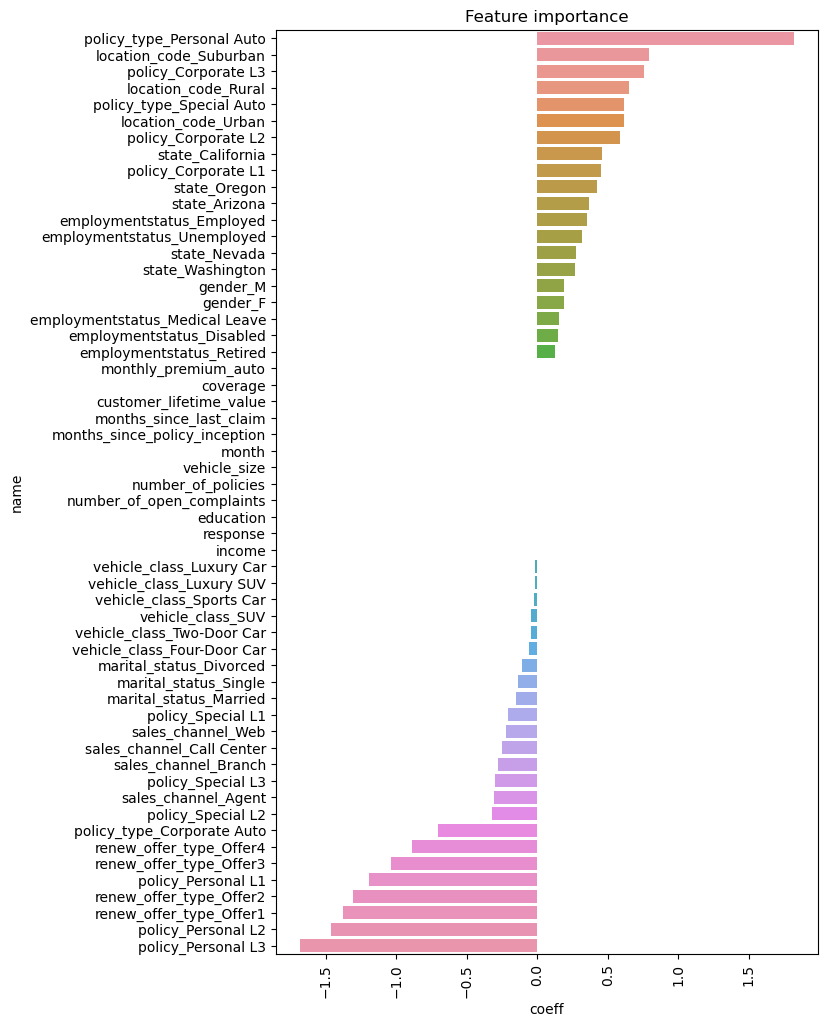

In [136]:
plt.figure(figsize=(7,12))
fi_plot = sns.barplot(y=fi_df['name'],x=fi_df['coeff'])
fi_plot.set_xticklabels(fi_plot.get_xticklabels(), rotation=90)
plt.title('Feature importance')
plt.show()

In [82]:
# Retrain the model after dropping the variables with low coefficients and applying StandardScaler instead
# response, coverage, education, vehicle_size,income,monthly_premium,
# number_of_open_complaints,number_of_policies,month

In [87]:
mark_df2 = mark_df.drop(['response', 'coverage', 'education', 'vehicle_size', 'income', 'monthly_premium_auto',
                         'number_of_open_complaints','number_of_policies','month'], axis=1)

In [88]:
mark_df2

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,...,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,customer_lifetime_value,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,4809.216960,7.000000,52,292.800000
1,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,2228.525238,3.000000,26,744.924331
2,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,14947.917300,34.000000,31,480.000000
3,0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,22332.439460,10.000000,3,484.013411
4,0,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,9025.067525,15.149071,31,707.925645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,15563.369440,15.149071,40,1214.400000
10906,0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,5259.444853,7.000000,68,273.018929
10907,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,23893.304100,11.000000,63,381.306996
10908,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,11971.977650,0.000000,27,618.288849


In [94]:
X2 = mark_df2.drop(['total_claim_amount'],axis=1)
y2 = mark_df2[['total_claim_amount']]

In [104]:
# X-y split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,random_state = 42)

# transform X train
scale_X2 = StandardScaler()
scale_X2.fit(X_train2)
X_train2_scaled = scale_X2.transform(X_train2)

X_train2 = pd.DataFrame(X_train2_scaled)
X_train2.columns = X2.columns

In [105]:
# transform X test

X_test2_scaled = scale_X2.transform(X_test2)
X_test2 = pd.DataFrame(X_test2_trans)
X_test2.columns = X2.columns


In [106]:
lm2 = LinearRegression()
model2 = lm.fit(X_train2,y_train2) 

In [107]:
model2.coef_

array([[ 1.22030481e+12,  1.53234305e+12,  9.22846965e+11,
         1.42042309e+12,  8.93257329e+11, -9.62024088e+13,
        -2.24161342e+14, -9.69840270e+13, -7.84518098e+13,
        -2.01822166e+14, -4.77106327e+14, -4.77106327e+14,
         1.06303040e+15,  1.28488393e+15,  9.99779966e+14,
        -2.20878755e+14, -3.07319445e+14, -2.77492534e+14,
         5.54356238e+14,  3.84954871e+14,  8.13764026e+14,
        -7.74016646e+14, -9.96715793e+14, -1.29200818e+15,
        -1.23407564e+15, -1.51602044e+15, -1.73738456e+15,
        -5.90138001e+14, -9.04243262e+14, -8.51901964e+14,
        -1.09825153e+15, -1.04059114e+15, -8.23207227e+14,
        -7.05343362e+14,  8.51340424e+14,  7.84375996e+14,
         6.92514767e+14,  6.23515775e+14,  5.79803096e+14,
         1.54370988e+14,  1.59195725e+14,  4.56450831e+14,
         2.53645966e+14,  4.59265150e+14,  2.02787170e+01,
         4.11112976e+00,  7.33951569e-01]])

In [108]:
model.coef_

array([[ 1.22030481e+12,  1.53234305e+12,  9.22846965e+11,
         1.42042309e+12,  8.93257329e+11, -9.62024088e+13,
        -2.24161342e+14, -9.69840270e+13, -7.84518098e+13,
        -2.01822166e+14, -4.77106327e+14, -4.77106327e+14,
         1.06303040e+15,  1.28488393e+15,  9.99779966e+14,
        -2.20878755e+14, -3.07319445e+14, -2.77492534e+14,
         5.54356238e+14,  3.84954871e+14,  8.13764026e+14,
        -7.74016646e+14, -9.96715793e+14, -1.29200818e+15,
        -1.23407564e+15, -1.51602044e+15, -1.73738456e+15,
        -5.90138001e+14, -9.04243262e+14, -8.51901964e+14,
        -1.09825153e+15, -1.04059114e+15, -8.23207227e+14,
        -7.05343362e+14,  8.51340424e+14,  7.84375996e+14,
         6.92514767e+14,  6.23515775e+14,  5.79803096e+14,
         1.54370988e+14,  1.59195725e+14,  4.56450831e+14,
         2.53645966e+14,  4.59265150e+14,  2.02787170e+01,
         4.11112976e+00,  7.33951569e-01]])

In [109]:
model2.intercept_

array([433.65732528])

In [110]:
model.intercept_

array([433.65732528])

In [116]:
# create y_pred2

y_pred2 = model.predict(X_test2) 
y_pred2 = pd.DataFrame(y_pred2)
y_pred2.columns = ['y_pred2']

In [117]:
y_test2 = y_test2.reset_index(drop=True)
y_test2.columns = ['y_test2']

In [118]:
residuals_test2 = pd.concat([y_test2,y_pred2],axis=1)
residuals_test2['residual'] = residuals_test2['y_test2']-residuals_test2['y_pred2']
residuals_test2

,y_test2,y_pred2,residual
0,432.408100,6.347107e+22,-6.347107e+22
1,511.200000,6.347086e+22,-6.347086e+22
2,325.395532,6.347113e+22,-6.347113e+22
3,480.578584,6.346563e+22,-6.346563e+22
4,1452.213743,6.347005e+22,-6.347005e+22
...,...,...,...
2571,379.029102,6.347099e+22,-6.347099e+22
2572,17.375878,6.347102e+22,-6.347102e+22
2573,355.200000,6.346967e+22,-6.346967e+22
2574,553.503610,6.347100e+22,-6.347100e+22


In [111]:
from sklearn.metrics import r2_score

In [112]:
r2_test

0.76

In [119]:
r2_test2 = round(r2_score(y_test2,y_pred2),2)
r2_test2

-4.461935979404256e+40

In [ ]:
# something went wrong... 